In [1]:
import pandas as pd
import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sql_functions_sp as sf
import python_functions_sp as pf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

---

Import tables as DataFrames:

In [3]:
schema = 'capstone_health_education'
table = 'HFA_data_p1_filtered'

sql_query = f'SELECT * FROM {schema}."{table}";'
HFA_data_p1 = sf.get_dataframe(sql_query)

In [4]:
schema = 'capstone_health_education'
table = 'HFA_data_p2_filtered'

sql_query = f'SELECT * FROM {schema}."{table}";'
HFA_data_p2 = sf.get_dataframe(sql_query)

In [5]:
schema = 'capstone_health_education'
table = 'HFA_data_p3_filtered'

sql_query = f'SELECT * FROM {schema}."{table}";'
HFA_data_p3 = sf.get_dataframe(sql_query)

Put column names in lower case and snake case:

In [6]:
HFA_data_p1 = pf.columns_lower_snake_case_2(HFA_data_p1)
HFA_data_p2 = pf.columns_lower_snake_case_2(HFA_data_p2)
HFA_data_p3 = pf.columns_lower_snake_case_2(HFA_data_p3)

In [7]:
HFA_data_p1.shape

(569, 25)

In [8]:
HFA_data_p2.shape

(889, 25)

In [9]:
HFA_data_p3.shape

(442, 25)

Join the three DataFrames:

In [10]:
frames = [HFA_data_p1, HFA_data_p2, HFA_data_p3]
HFA_df = pd.concat(frames)

In [11]:
HFA_df.shape    # 569+88++442 = 1900

(1900, 25)

---

# Exploratory Data Analysis - EDA
- understand the data
- drop unneeded columns
- duplicates
- missing values
- descriptive statistics
- extreme values / outliers

### Understand the Data
remember: dtype 'object' means string or mixed data-types

In [12]:
HFA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1900 entries, 0 to 441
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measure_code    1900 non-null   object 
 1   country_region  1900 non-null   object 
 2   2000            1707 non-null   float64
 3   2001            1602 non-null   float64
 4   2002            1603 non-null   float64
 5   2003            1610 non-null   float64
 6   2004            1617 non-null   float64
 7   2005            1693 non-null   float64
 8   2006            1623 non-null   float64
 9   2007            1648 non-null   float64
 10  2008            1634 non-null   float64
 11  2009            1659 non-null   float64
 12  2010            1696 non-null   float64
 13  2011            1661 non-null   float64
 14  2012            1647 non-null   float64
 15  2013            1639 non-null   float64
 16  2014            1624 non-null   float64
 17  2015            1674 non-null   float64

In [13]:
HFA_df['country_region'].unique()

array(['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BLR', 'BEL', 'BIH', 'BGR',
       'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'GEO', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'KAZ', 'KGZ', 'LVA',
       'LTU', 'LUX', 'MLT', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL',
       'PRT', 'MDA', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP',
       'SWE', 'CHE', 'TJK', 'TUR', 'TKM', 'UKR', 'GBR', 'UZB',
       'CARINFONET', 'CIS', 'EU_AFTER_MAY2004', 'EU_BEFORE_MAY2004',
       'EU_MEMBERS', 'EU_BEFORE_FEB2020', 'NORDIC', 'SEEHN', 'SMALL',
       'WESTERN_BALKANS', 'WHO_EURO'], dtype=object)

---

## Explore and Clean the Data

### **Unneeded columns** are dropped yet!

### Check for **duplicates**

In [14]:
HFA_df.duplicated().value_counts()

False    1900
Name: count, dtype: int64

No duplicates!

### Check for **missing values**

In [15]:
HFA_df.isnull().sum()

measure_code         0
country_region       0
2000               193
2001               298
2002               297
2003               290
2004               283
2005               207
2006               277
2007               252
2008               266
2009               241
2010               204
2011               239
2012               253
2013               261
2014               276
2015               226
2016               266
2017               408
2018               504
2019               549
2020              1204
2021              1496
2022              1800
dtype: int64

For 2020, 2021 and 2022 we have data for less than 50% of the countries / regions OR measure variables => drop these years?!

In [16]:
HFA_df.groupby(['measure_code']).count().iloc[:, :12]

,country_region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
measure_code,,,,,,,,,,,,
HFA_1,64,64,64,64,64,64,64,64,64,64,64,64
HFA_10,64,64,64,64,64,64,64,64,64,64,64,64
HFA_101,62,59,58,57,57,58,57,53,56,55,57,53
HFA_13,64,63,63,64,64,64,64,63,63,64,63,64
HFA_16,64,63,63,62,62,62,63,63,63,62,63,63
HFA_167,62,57,55,53,53,51,51,46,48,47,50,46
HFA_19,64,63,63,62,62,62,63,63,63,62,63,63
HFA_194,62,59,59,58,58,58,57,53,56,55,57,53
HFA_260,62,59,58,57,57,58,57,53,56,55,57,53


In [17]:
HFA_df.groupby(['measure_code']).count().iloc[:, 12:]

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
measure_code,,,,,,,,,,,,
HFA_1,64,64,64,64,64,64,64,64,64,63,64,64
HFA_10,64,64,64,64,64,64,60,64,64,60,53,0
HFA_101,55,54,53,52,50,50,48,43,42,28,11,0
HFA_13,64,64,64,64,64,64,64,64,64,57,53,0
HFA_16,64,64,64,63,64,62,64,62,61,57,48,11
HFA_167,48,48,49,48,47,50,47,42,40,28,11,0
HFA_19,64,64,64,63,64,62,64,59,58,48,41,11
HFA_194,55,54,53,52,50,50,48,43,42,28,11,0
HFA_260,55,54,53,52,50,50,48,43,42,28,11,0


Less data for:
- HFA_411
- some years in HFA_417, especially since 2016
- **HFA_625**: only data for two years => drop it!
- a lot of missing values for years **2020**, **2021**, **2022** => drop them?

Dropping HFA_625: "Number cigarettes consumed per person per year" 

In [18]:
HFA_df['measure_code'].unique()

array(['HFA_1', 'HFA_43', 'HFA_10', 'HFA_167', 'HFA_13', 'HFA_16',
       'HFA_19', 'HFA_101', 'HFA_194', 'HFA_260', 'HFA_417', 'HFA_275',
       'HFA_293', 'HFA_357', 'HFA_411', 'HFA_436', 'HFA_440', 'HFA_441',
       'HFA_442', 'HFA_443', 'HFA_444', 'HFA_445', 'HFA_446', 'HFA_454',
       'HFA_546', 'HFA_566', 'HFA_617', 'HFA_618', 'HFA_625', 'HFA_627',
       'HFA_636', 'HFA_637'], dtype=object)

In [19]:
HFA_df = HFA_df[~(HFA_df['measure_code'] == 'HFA_625')]

In [20]:
HFA_df['measure_code'].unique()

array(['HFA_1', 'HFA_43', 'HFA_10', 'HFA_167', 'HFA_13', 'HFA_16',
       'HFA_19', 'HFA_101', 'HFA_194', 'HFA_260', 'HFA_417', 'HFA_275',
       'HFA_293', 'HFA_357', 'HFA_411', 'HFA_436', 'HFA_440', 'HFA_441',
       'HFA_442', 'HFA_443', 'HFA_444', 'HFA_445', 'HFA_446', 'HFA_454',
       'HFA_546', 'HFA_566', 'HFA_617', 'HFA_618', 'HFA_627', 'HFA_636',
       'HFA_637'], dtype=object)

### Rename values, i.e. give values meaningful names

Join various tables to...
- rename the measure variables
- give full name to countries and regions

Rename the measure variables:

In [21]:
schema = 'capstone_health_education'
table = 'HFA_metadata_sh4'

# sql_query = f'SELECT * FROM {schema}."{table}";'
sql_query = f'SELECT "Measure labels", "Unnamed: 1" FROM {schema}."{table}" WHERE "Measure labels" LIKE \'HFA%%\';'
measure_names = sf.get_dataframe(sql_query)

In [22]:
# schema = 'capstone_health_education'
# table = 'HFA_metadata_sh4'

# # sql_query = f'SELECT * FROM {schema}."{table}";'
# sql_query = f'SELECT "Measure labels", "Unnamed: 1" FROM {schema}."{table}";'
# measure_names = sf.get_dataframe(sql_query)

In [23]:
measure_names

,Measure labels,Unnamed: 1
0,HFA_1,"Mid-year population, by sex"
1,HFA_2,Mid-year male population
2,HFA_3,Mid-year female population
3,HFA_10,"% of population aged 0–14 years, by sex"
4,HFA_11,"% of population aged 0–14 years, males"
...,...,...
616,HFA_639,"Youth unemployment rate, % of labor force ages..."
617,HFA_640,"Number of maternal deaths, clinical data"
618,HFA,European Health for All database
619,HFA,European Health for All database (WHO)


In [24]:
measure_names.rename(columns={'Measure labels': 'measure_code', 'Unnamed: 1': 'measure_label'}, inplace=True)

In [25]:
HFA_df = pd.merge(HFA_df, measure_names, on='measure_code', how='left')

Give full names to countries and regions:

In [26]:
schema = 'capstone_health_education'
table = 'HFA_metadata_sh5'

sql_query = f'SELECT * FROM {schema}."{table}";'
country_names = sf.get_dataframe(sql_query)

In [27]:
country_names.drop(['ISO 2', 'ISO 3', 'WHO code', 'Short name'], axis=1, inplace=True)

In [28]:
country_names.rename(columns={'Code': 'country_region', 'Full name': 'name'}, inplace=True)

In [29]:
schema = 'capstone_health_education'
table = 'HFA_metadata_sh6'

sql_query = f'SELECT * FROM {schema}."{table}";'
region_names = sf.get_dataframe(sql_query)

In [30]:
region_names.drop(['Full name'], axis=1, inplace=True)

In [31]:
region_names.rename(columns={'Code': 'country_region', 'Short name': 'name'}, inplace=True)

In [32]:
cat = pd.concat([country_names, region_names], ignore_index=True)

In [33]:
HFA_df = pd.merge(HFA_df, cat, on='country_region', how='left').copy()

In [34]:
HFA_df

,measure_code,country_region,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,measure_label,name
0,HFA_1,ALB,"3,114,000.00","3,069,275.00","3,084,150.00","3,102,764.00","3,127,263.00","3,011,490.00","2,992,551.00","2,970,021.00",...,"2,889,173.00","2,903,700.00","2,870,324.00","2,862,427.00","2,862,427.00","2,862,427.00","2,811,666.00","2,842,321.00","Mid-year population, by sex",Albania
1,HFA_1,AND,"65,907.00","66,087.00","66,744.00","69,739.50","74,597.50","77,712.00","79,885.00","82,179.00",...,"77,481.00","77,872.00","79,236.00","80,242.00","81,011.00","81,011.00","79,034.00","79,824.00","Mid-year population, by sex",Andorra
2,HFA_1,ARM,"3,226,899.00","3,215,312.00","3,212,878.00","3,211,267.00","3,214,030.00","3,217,534.00","3,230,086.00","3,226,520.00",...,"3,004,588.00","3,026,048.00","2,979,442.00","2,969,001.00","2,962,482.00","2,961,473.00","2,962,309.00","2,780,469.00","Mid-year population, by sex",Armenia
3,HFA_1,AUT,"8,011,566.00","8,042,293.00","8,082,121.00","8,118,245.00","8,169,441.00","8,225,278.00","8,267,948.00","8,295,189.00",...,"8,629,519.00","8,739,806.00","8,795,073.00","8,837,707.00","8,877,637.00","8,916,845.00","8,951,520.00","8,939,617.00","Mid-year population, by sex",Austria
4,HFA_1,AZE,"8,048,600.00","8,111,200.00","8,171,950.00","8,234,100.00","8,306,500.00","8,391,850.00","8,609,450.00","8,581,300.00",...,"9,649,300.00","9,757,790.50","9,854,050.00","9,854,050.00","9,854,050.00","9,854,050.00","10,312,992.00","10,358,074.00","Mid-year population, by sex",Azerbaijan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,HFA_637,EU_MEMBERS,19.20,18.08,18.76,19.00,19.45,19.60,18.30,16.36,...,23.46,21.65,NaN,NaN,NaN,NaN,NaN,NaN,"Youth unemployment rate, % of total labor forc...",Members of the European Union
1847,HFA_637,NORDIC,13.35,14.33,15.06,15.91,17.06,16.40,15.25,13.64,...,16.44,15.89,NaN,NaN,NaN,NaN,NaN,NaN,"Youth unemployment rate, % of total labor forc...",Nordic countries
1848,HFA_637,SEEHN,25.94,26.88,28.96,27.89,29.54,28.69,28.59,26.04,...,26.64,23.92,NaN,NaN,NaN,NaN,NaN,NaN,"Youth unemployment rate, % of total labor forc...",South-eastern Europe Health Network members (S...
1849,HFA_637,SMALL,20.05,20.39,20.28,22.38,23.27,22.89,19.83,16.96,...,24.26,22.81,NaN,NaN,NaN,NaN,NaN,NaN,"Youth unemployment rate, % of total labor forc...",Small countries


In [35]:
HFA_df = HFA_df[['measure_code', 'measure_label', 'country_region', 'name', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022']]

In [36]:
HFA_df #.sample(10)

,measure_code,measure_label,country_region,name,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,HFA_1,"Mid-year population, by sex",ALB,Albania,"3,114,000.00","3,069,275.00","3,084,150.00","3,102,764.00","3,127,263.00","3,011,490.00",...,"2,896,655.00","2,889,676.00","2,889,173.00","2,903,700.00","2,870,324.00","2,862,427.00","2,862,427.00","2,862,427.00","2,811,666.00","2,842,321.00"
1,HFA_1,"Mid-year population, by sex",AND,Andorra,"65,907.00","66,087.00","66,744.00","69,739.50","74,597.50","77,712.00",...,"76,172.00","72,785.00","77,481.00","77,872.00","79,236.00","80,242.00","81,011.00","81,011.00","79,034.00","79,824.00"
2,HFA_1,"Mid-year population, by sex",ARM,Armenia,"3,226,899.00","3,215,312.00","3,212,878.00","3,211,267.00","3,214,030.00","3,217,534.00",...,"3,021,979.00","3,006,154.00","3,004,588.00","3,026,048.00","2,979,442.00","2,969,001.00","2,962,482.00","2,961,473.00","2,962,309.00","2,780,469.00"
3,HFA_1,"Mid-year population, by sex",AUT,Austria,"8,011,566.00","8,042,293.00","8,082,121.00","8,118,245.00","8,169,441.00","8,225,278.00",...,"8,477,230.00","8,543,932.00","8,629,519.00","8,739,806.00","8,795,073.00","8,837,707.00","8,877,637.00","8,916,845.00","8,951,520.00","8,939,617.00"
4,HFA_1,"Mid-year population, by sex",AZE,Azerbaijan,"8,048,600.00","8,111,200.00","8,171,950.00","8,234,100.00","8,306,500.00","8,391,850.00",...,"9,416,800.00","9,629,779.00","9,649,300.00","9,757,790.50","9,854,050.00","9,854,050.00","9,854,050.00","9,854,050.00","10,312,992.00","10,358,074.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,HFA_637,"Youth unemployment rate, % of total labor forc...",EU_MEMBERS,Members of the European Union,19.20,18.08,18.76,19.00,19.45,19.60,...,26.63,25.36,23.46,21.65,NaN,NaN,NaN,NaN,NaN,NaN
1847,HFA_637,"Youth unemployment rate, % of total labor forc...",NORDIC,Nordic countries,13.35,14.33,15.06,15.91,17.06,16.40,...,17.44,16.95,16.44,15.89,NaN,NaN,NaN,NaN,NaN,NaN
1848,HFA_637,"Youth unemployment rate, % of total labor forc...",SEEHN,South-eastern Europe Health Network members (S...,25.94,26.88,28.96,27.89,29.54,28.69,...,28.93,28.77,26.64,23.92,NaN,NaN,NaN,NaN,NaN,NaN
1849,HFA_637,"Youth unemployment rate, % of total labor forc...",SMALL,Small countries,20.05,20.39,20.28,22.38,23.27,22.89,...,26.69,25.90,24.26,22.81,NaN,NaN,NaN,NaN,NaN,NaN


### Do some **descriptive statistics**

In [37]:
HFA_df.iloc[:, :15].describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,"1,665.00","1,601.00","1,602.00","1,609.00","1,616.00","1,693.00","1,623.00","1,648.00","1,634.00","1,659.00","1,696.00"
mean,"2,163,906.60","2,252,946.19","2,258,956.90","2,250,995.98","2,252,165.24","2,154,857.48","2,256,269.36","2,232,291.26","2,262,571.19","2,237,042.97","2,196,576.47"
std,"29,496,625.83","30,122,327.09","30,211,758.91","30,180,479.52","30,259,517.61","29,641,132.91","30,388,874.09","30,287,550.03","30,554,490.55","30,438,655.09","30,217,581.47"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.21,0.00,0.17
25%,15.70,15.42,15.59,15.84,15.84,16.02,15.29,15.00,14.80,15.17,15.52
50%,62.56,56.55,56.00,55.60,58.30,62.78,57.51,58.35,57.80,57.91,62.30
75%,226.94,249.67,238.12,235.64,233.31,220.54,227.30,225.75,223.91,219.91,189.50
max,"865,472,332.00","866,906,178.00","869,348,748.00","869,873,720.00","874,266,729.00","876,359,221.00","879,353,183.50","883,130,276.00","887,301,473.00","891,105,365.50","894,911,308.50"


In [38]:
HFA_df.iloc[:, 15:].describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,"1,661.00","1,647.00","1,639.00","1,624.00","1,674.00","1,634.00","1,492.00","1,396.00","1,351.00",696.00,404.00,100.00
mean,"2,247,610.15","2,276,124.01","2,294,839.56","2,324,353.10","2,259,092.71","2,325,208.30","2,553,072.50","2,722,541.55","2,820,242.81","5,244,977.95","9,404,392.93","37,972,620.43"
std,"30,598,113.19","30,855,327.37","31,020,242.64","31,293,551.44","30,865,636.62","31,388,517.39","32,927,455.20","34,112,208.93","34,762,663.61","48,052,356.32","63,324,027.68","123,397,734.33"
min,0.10,0.11,0.02,0.04,0.03,0.01,0.03,0.07,0.06,0.05,0.05,0.10
25%,15.01,15.28,15.24,15.31,16.27,15.61,14.41,15.48,16.80,14.61,13.35,163.35
50%,57.30,57.70,58.20,58.49,63.42,62.68,64.06,74.29,77.25,34.45,23.89,"2,811,395.00"
75%,201.77,198.69,198.15,196.05,190.75,202.49,256.43,261.90,267.25,457.88,"5,331.75","10,488,702.25"
max,"898,237,270.00","902,339,551.30","905,804,237.60","910,249,690.00","911,437,817.50","917,130,763.50","920,341,828.00","923,087,825.50","926,104,268.00","927,283,375.50","929,811,280.60","929,143,434.00"


Short explanation of the reported measures:
- count: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- mean: average value of the data
- std: standard deviation of the data
- min: the smallest value in the data set
- 25%: 25 % of the data are below this value
- 50%: 50% of the data are below this value. This value is called the median.
- 75%: 75% of the data are below this value
- max: the largest expression in the data set

### Check for **extreme values / outliers**

In [39]:
HFA_df.sample(10)

,measure_code,measure_label,country_region,name,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
247,HFA_16,"Live births per 1000 population, by sex",CARINFONET,Central Asian Republics Information Network me...,20.02,19.47,19.88,19.76,20.48,20.52,...,23.95,25.30,25.29,24.63,23.33,24.00,24.12,24.16,23.89,NaN
731,HFA_293,"Selected alcohol-related causes, per 100 000, ...",ROU,Romania,118.10,122.26,127.02,121.24,114.88,110.17,...,88.59,88.62,86.00,86.65,87.00,87.65,86.40,NaN,NaN,NaN
367,HFA_43,"Life expectancy at birth (years), by sex",TJK,Tajikistan,72.50,72.17,72.15,72.77,73.34,73.72,...,NaN,NaN,NaN,NaN,74.49,NaN,NaN,NaN,NaN,NaN
171,HFA_13,"% of population aged 65+ years, by sex",SRB,Serbia,16.11,16.41,16.68,16.89,17.04,17.16,...,17.81,18.25,18.73,19.17,19.63,20.17,20.69,21.11,21.28,NaN
256,HFA_16,"Live births per 1000 population, by sex",WESTERN_BALKANS,Western Balkans,11.81,11.99,11.41,11.51,10.85,10.31,...,9.76,9.88,9.56,9.50,9.66,9.43,9.27,9.03,9.07,NaN
808,HFA_357,"Incidence of cancer per 100 000, by sex",EU_BEFORE_MAY2004,Members of the EU before May 2004 (EU15),478.63,484.10,494.34,506.12,516.96,523.55,...,579.72,587.76,591.88,596.14,591.96,588.10,588.83,NaN,NaN,NaN
284,HFA_19,"Number of live births, by sex",LVA,Latvia,"20,302.00","19,726.00","20,127.00","21,151.00","20,551.00","21,879.00",...,"20,596.00","21,746.00","21,979.00","21,968.00","20,828.00","19,314.00","18,786.00","17,552.00","17,420.00",NaN
228,HFA_16,"Live births per 1000 population, by sex",NOR,Norway,13.25,12.56,12.22,12.37,12.40,12.28,...,11.61,11.48,11.33,11.17,10.86,10.49,10.30,9.94,10.45,NaN
1842,HFA_637,"Youth unemployment rate, % of total labor forc...",CARINFONET,Central Asian Republics Information Network me...,21.63,19.31,18.65,16.79,15.45,13.91,...,9.38,9.59,9.69,9.71,NaN,NaN,NaN,NaN,NaN,NaN
434,HFA_101,"Diseases of circulatory system, all ages, per ...",UZB,Republic of Uzbekistan,772.34,748.78,772.64,743.95,699.74,754.11,...,666.95,666.03,640.34,637.46,NaN,NaN,NaN,NaN,NaN,NaN


To work with the numbers in the year-columns **split the huge DataFrame** for each measure code into smaller ones:

In [40]:
HFA_df['measure_code'].unique()

array(['HFA_1', 'HFA_43', 'HFA_10', 'HFA_167', 'HFA_13', 'HFA_16',
       'HFA_19', 'HFA_101', 'HFA_194', 'HFA_260', 'HFA_417', 'HFA_275',
       'HFA_293', 'HFA_357', 'HFA_411', 'HFA_436', 'HFA_440', 'HFA_441',
       'HFA_442', 'HFA_443', 'HFA_444', 'HFA_445', 'HFA_446', 'HFA_454',
       'HFA_546', 'HFA_566', 'HFA_617', 'HFA_618', 'HFA_627', 'HFA_636',
       'HFA_637'], dtype=object)

In [41]:
measure_codes = ['HFA_1', 'HFA_43', 'HFA_10', 'HFA_167', 'HFA_13', 'HFA_16',
               'HFA_19', 'HFA_101', 'HFA_194', 'HFA_260', 'HFA_417', 'HFA_275',
               'HFA_293', 'HFA_357', 'HFA_411', 'HFA_436', 'HFA_440', 'HFA_441',
               'HFA_442', 'HFA_443', 'HFA_444', 'HFA_445', 'HFA_446', 'HFA_454',
               'HFA_546', 'HFA_566', 'HFA_617', 'HFA_618', 'HFA_627', 'HFA_636',
               'HFA_637']

# Create new list to safe the new DataFrames
new_dataframes = []

# Iterate over the measure codes
for code in measure_codes:
    # Filter the row for each year
    HFA_df_measure_code = HFA_df[HFA_df['measure_code'] == code].copy()

    # Add the new DataFrame to the list
    new_dataframes.extend([HFA_df_measure_code])

# Save the newly created DataFrames in new Variables
(HFA_1, HFA_43, HFA_10, HFA_167, HFA_13, HFA_16,
HFA_19, HFA_101, HFA_194, HFA_260, HFA_417, HFA_275,
HFA_293, HFA_357, HFA_411, HFA_436, HFA_440, HFA_441,
HFA_442, HFA_443, HFA_444, HFA_445, HFA_446, HFA_454,
HFA_546, HFA_566, HFA_617, HFA_618, HFA_627, HFA_636,
HFA_637) = new_dataframes[:]

Reset the index:

In [42]:
dataframes = [HFA_1, HFA_43, HFA_10, HFA_167, HFA_13, HFA_16,
            HFA_19, HFA_101, HFA_194, HFA_260, HFA_417, HFA_275,
            HFA_293, HFA_357, HFA_411, HFA_436, HFA_440, HFA_441,
            HFA_442, HFA_443, HFA_444, HFA_445, HFA_446, HFA_454,
            HFA_546, HFA_566, HFA_617, HFA_618, HFA_627, HFA_636,
            HFA_637]

for df in dataframes:
    df.reset_index(drop=True, inplace=True)

Check that only one code is saved in each DataFrame:

In [43]:
print(HFA_1['measure_code'].unique(), 
      HFA_43['measure_code'].unique(), 
      HFA_10['measure_code'].unique(), 
      HFA_167['measure_code'].unique(), 
      HFA_13['measure_code'].unique(), 
      HFA_16['measure_code'].unique(), 
      HFA_19['measure_code'].unique(), 
      HFA_101['measure_code'].unique(), 
      HFA_194['measure_code'].unique(), 
      HFA_260['measure_code'].unique(), 
      HFA_417['measure_code'].unique(), 
      HFA_275['measure_code'].unique(), 
      HFA_293['measure_code'].unique(), 
      HFA_357['measure_code'].unique(), 
      HFA_411['measure_code'].unique(), 
      HFA_436['measure_code'].unique(), 
      HFA_440['measure_code'].unique(), 
      HFA_441['measure_code'].unique(), 
      HFA_442['measure_code'].unique(), 
      HFA_443['measure_code'].unique(), 
      HFA_444['measure_code'].unique(), 
      HFA_445['measure_code'].unique(), 
      HFA_446['measure_code'].unique(), 
      HFA_454['measure_code'].unique(), 
      HFA_546['measure_code'].unique(), 
      HFA_566['measure_code'].unique(), 
      HFA_617['measure_code'].unique(), 
      HFA_618['measure_code'].unique(), 
      HFA_627['measure_code'].unique(), 
      HFA_636['measure_code'].unique(), 
      HFA_637['measure_code'].unique())


['HFA_1'] ['HFA_43'] ['HFA_10'] ['HFA_167'] ['HFA_13'] ['HFA_16'] ['HFA_19'] ['HFA_101'] ['HFA_194'] ['HFA_260'] ['HFA_417'] ['HFA_275'] ['HFA_293'] ['HFA_357'] ['HFA_411'] ['HFA_436'] ['HFA_440'] ['HFA_441'] ['HFA_442'] ['HFA_443'] ['HFA_444'] ['HFA_445'] ['HFA_446'] ['HFA_454'] ['HFA_546'] ['HFA_566'] ['HFA_617'] ['HFA_618'] ['HFA_627'] ['HFA_636'] ['HFA_637']


---

Plot the DataFrames:

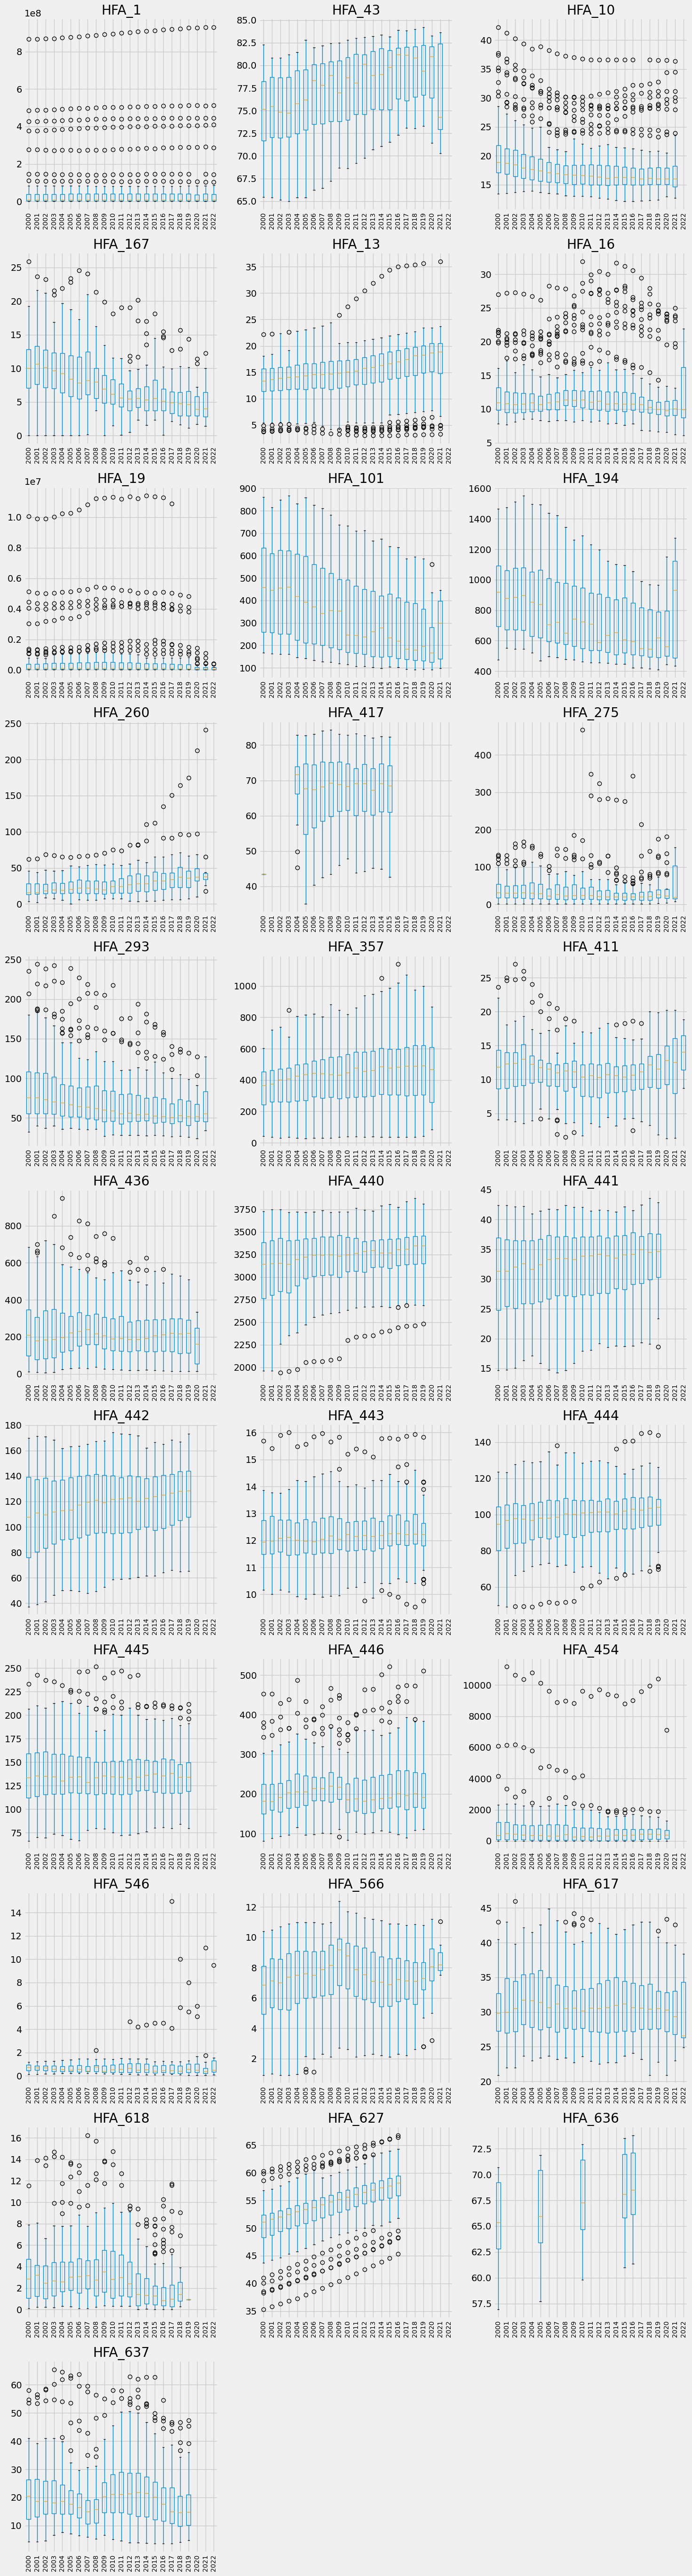

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary of dataframes with their names
dataframes = {
    'HFA_1': HFA_1, 'HFA_43': HFA_43, 'HFA_10': HFA_10, 'HFA_167': HFA_167, 'HFA_13': HFA_13, 'HFA_16': HFA_16,
    'HFA_19': HFA_19, 'HFA_101': HFA_101, 'HFA_194': HFA_194, 'HFA_260': HFA_260, 'HFA_417': HFA_417, 'HFA_275': HFA_275,
    'HFA_293': HFA_293, 'HFA_357': HFA_357, 'HFA_411': HFA_411, 'HFA_436': HFA_436, 'HFA_440': HFA_440, 'HFA_441': HFA_441,
    'HFA_442': HFA_442, 'HFA_443': HFA_443, 'HFA_444': HFA_444, 'HFA_445': HFA_445, 'HFA_446': HFA_446, 'HFA_454': HFA_454,
    'HFA_546': HFA_546, 'HFA_566': HFA_566, 'HFA_617': HFA_617, 'HFA_618': HFA_618, 'HFA_627': HFA_627, 'HFA_636': HFA_636,
    'HFA_637': HFA_637
}

# Calculate the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(dataframes) + n_cols - 1) // n_cols

# Generate boxplots for each dataframe
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for easy iteration if it's multi-dimensional
axes = axes.flatten()

for i, (name, df) in enumerate(dataframes.items()):
    df.boxplot(ax=axes[i])
    axes[i].set_title(name)
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=90, fontsize=10)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---

Write the DataFrames to the database:

In [45]:
dataframes = [HFA_1, HFA_43, HFA_10, HFA_167, HFA_13, HFA_16,
              HFA_19, HFA_101, HFA_194, HFA_260, HFA_417, HFA_275,
              HFA_293, HFA_357, HFA_411, HFA_436, HFA_440, HFA_441,
              HFA_442, HFA_443, HFA_444, HFA_445, HFA_446, HFA_454,
              HFA_546, HFA_566, HFA_617, HFA_618, HFA_627, HFA_636,
              HFA_637]

table_names = ['hfa_1', 'hfa_43', 'hfa_10', 'hfa_167', 'hfa_13', 'hfa_16',
               'hfa_19', 'hfa_101', 'hfa_194', 'hfa_260', 'hfa_417', 'hfa_275',
               'hfa_293', 'hfa_357', 'hfa_411', 'hfa_436', 'hfa_440', 'hfa_441',
               'hfa_442', 'hfa_443', 'hfa_444', 'hfa_445', 'hfa_446', 'hfa_454',
               'hfa_546', 'hfa_566', 'hfa_617', 'hfa_618', 'hfa_627', 'hfa_636',
               'hfa_637']

for df, table_name in zip(dataframes, table_names):
    sf.push_to_cloud(df, table_name)

The hfa_1 table was imported successfully.
The hfa_43 table was imported successfully.
The hfa_10 table was imported successfully.
The hfa_167 table was imported successfully.
The hfa_13 table was imported successfully.
The hfa_16 table was imported successfully.
The hfa_19 table was imported successfully.
The hfa_101 table was imported successfully.
The hfa_194 table was imported successfully.
The hfa_260 table was imported successfully.
The hfa_417 table was imported successfully.
The hfa_275 table was imported successfully.
The hfa_293 table was imported successfully.
The hfa_357 table was imported successfully.
The hfa_411 table was imported successfully.
The hfa_436 table was imported successfully.
The hfa_440 table was imported successfully.
The hfa_441 table was imported successfully.
The hfa_442 table was imported successfully.
The hfa_443 table was imported successfully.
The hfa_444 table was imported successfully.
The hfa_445 table was imported successfully.
The hfa_446 table